In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import mrspoc 
import astropy.units as u

from mrspoc import Star, Spot

/Users/bmmorris/git/mrspoc/mrspoc/star.py:281: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


[Text(0,0.5,'Absolute centroid error'), Text(0.5,0,'Pixels')]

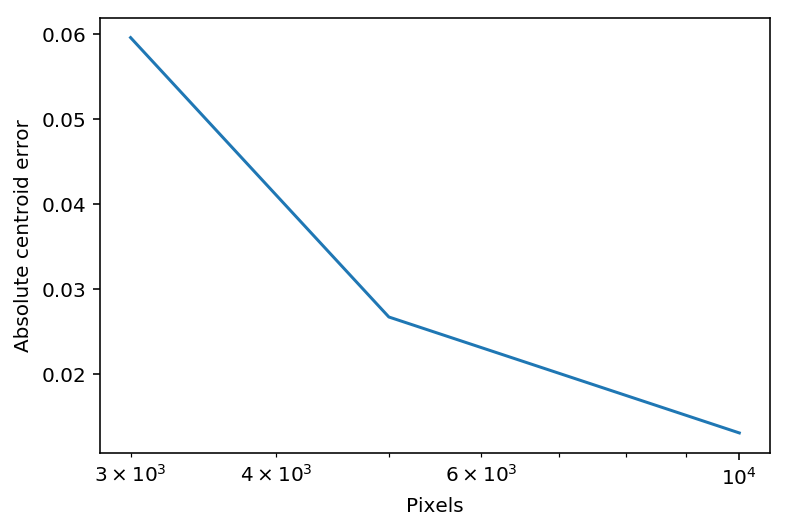

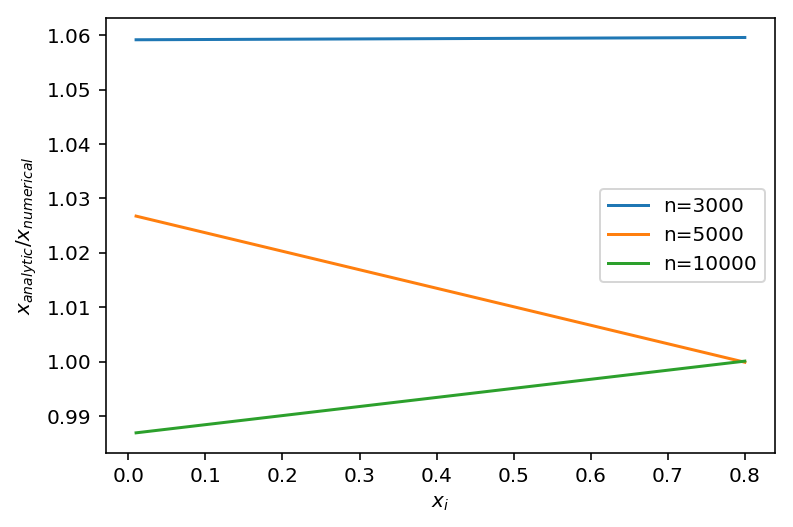

In [2]:
star = Star()
#star.plot(col_exaggerate=100, ax=ax)
x_precise = star.center_of_light[0]

n_range = np.array([3e3, 5e3, 10e3]).astype(int)
x_range = np.linspace(0.01, 0.8, 2)

fig, ax = plt.subplots()

fig2, ax2 = plt.subplots()

max_dev = []

for n in n_range:
    x_a = []
    x_n = []
    for x in x_range:
        star = Star(spots=[Spot(-x, 0.0, 0.003)])
        x_analytic = star._centroid_analytic()[0]
        x_numerical = star._centroid_numerical(n=n)[0]
        x_a.append(x_analytic)
        x_n.append(x_numerical)

        ratio = np.array(x_a)/np.array(x_n)
    ax2.plot(x_range, ratio, label='n={0}'.format(n))
    
    max_dev.append(np.abs(1-ratio).max())
    
ax2.set_ylabel('$x_{analytic} / x_{numerical}$')
ax2.set_xlabel('$x_i$')
ax2.legend()

ax.semilogx(n_range, max_dev)
ax.set(xlabel='Pixels', ylabel='Absolute centroid error')

/Users/bmmorris/git/mrspoc/mrspoc/star.py:281: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


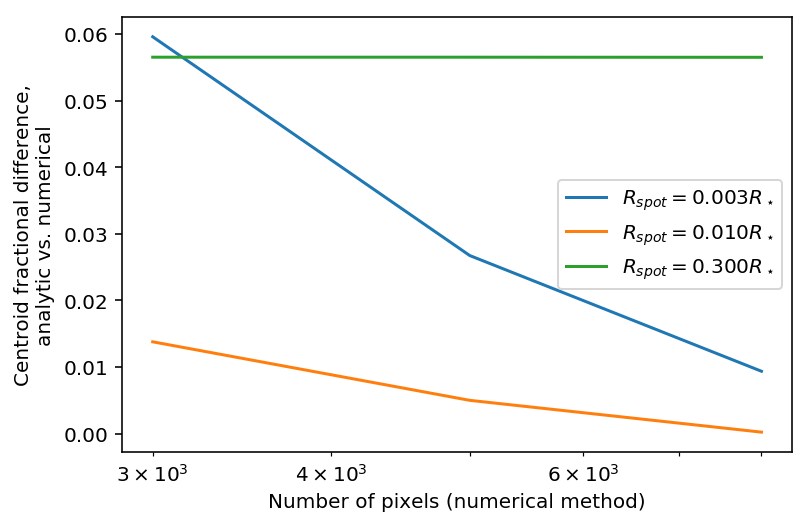

In [5]:
star = Star()
#star.plot(col_exaggerate=100, ax=ax)
x_precise = star.center_of_light[0]

n_range = np.array([3e3, 5e3, 8e3]).astype(int)
x_range = np.linspace(0.01, 0.8, 2)
r_range = np.array([0.003, 0.01, 0.3])

fig, ax = plt.subplots()

for r in r_range:
    max_dev = []

    for n in n_range:
        x_a = []
        x_n = []
        for x in x_range:
            star = Star(spots=[Spot(-x, 0.0, r)])
            x_analytic = star._centroid_analytic()[0]
            x_numerical = star._centroid_numerical(n=n)[0]
            x_a.append(x_analytic)
            x_n.append(x_numerical)
            ratio = np.array(x_a)/np.array(x_n)
        max_dev.append(np.abs(1-ratio).max())

    ax.semilogx(n_range, max_dev, label='$R_{{spot}} = {0:.3f} R_\star$'.format(r))
ax.set(xlabel='Number of pixels (numerical method)', 
       ylabel='Centroid fractional difference,\nanalytic vs. numerical')
ax.legend()

In [7]:
fig.savefig('plots/validation.pdf', bbox_inches='tight')